# keras tuner
Dataset: https://www.kaggle.com/aakash50897/churn-modellingcsv

classification

In [ ]:
!pip install keras-tuner

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras_tuner import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix

In [19]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [20]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [22]:
X['Geography'].unique(), X['Gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [23]:
# creating dummy variables
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [24]:
X = pd.concat([X,geography,gender],axis=1)
X = X.drop(columns=['Geography','Gender'],axis=1)

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(layers.Dense(units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),kernel_initializer='he_uniform',activation="relu"))
        model.add(Dropout(0.1))
    model.add(layers.Dense(1,kernel_initializer='glorot_uniform', activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
    directory="my_dir",
    project_name="keras_tuner",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs=5,validation_data=(X_test, y_test))

Trial 5 Complete [00h 02m 00s]
val_accuracy: 0.8303333322207133

Best val_accuracy So Far: 0.856333335240682
Total elapsed time: 00h 04m 37s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/keras_tuner
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 512
units_1: 192
learning_rate: 0.0001
units_2: 224
units_3: 160
units_4: 384
units_5: 256
units_6: 32
units_7: 32
units_8: 32
Score: 0.856333335240682
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 320
learning_rate: 0.0001
units_2: 256
units_3: 160
units_4: 480
units_5: 96
units_6: 160
units_7: 256
units_8: 64
units_9: 448
units_10: 288
units_11: 480
units_12: 288
units_13: 224
Score: 0.843833327293396
Trial summary
Hyperparameters:
num_layers: 6
units_0: 320
units_1: 288
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.8400000135103861
Trial summary
Hyperparameters:
num_layers: 14
units_0: 160
units_1: 224
learning_rate: 0.001
units_2: 128
units_3: 160
units_4: 32
units_5: 288
units_6: 160
units_7: 416
units_8: 256
units_9: 32
units_10: 32
units_11: 32
units_12: 32
uni

### Best result


```
Hyperparameters:
num_layers: 9
units_0: 512
units_1: 192
learning_rate: 0.0001
units_2: 224
units_3: 160
units_4: 384
units_5: 256
units_6: 32
units_7: 32
units_8: 32
Score: 0.856333335240682
```




## Implementation

In [32]:
model = Sequential()

# layer - 1
model.add(Dense(units=512, kernel_initializer='he_uniform',activation='relu',input_dim=11))
model.add(Dropout(0.1))

# layer - 2
model.add(Dense(units=192, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# layer - 3
model.add(Dense(units=224, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# layer - 4
model.add(Dense(units=160, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# layer - 5
model.add(Dense(units=384, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# layer - 6
model.add(Dense(units=256, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# layer - 7
model.add(Dense(units=32, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# layer - 8
model.add(Dense(units=32, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# layer - 9
model.add(Dense(units=32, kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.1))

# output layer - 1 neurons (binary classification)
model.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

# compiling model
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate = 0.0001), loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               6144      
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 192)               98496     
_________________________________________________________________
dropout_30 (Dropout)         (None, 192)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 224)               43232     
_________________________________________________________________
dropout_31 (Dropout)         (None, 224)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 160)              

In [34]:
model_history = model.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=100)

Epoch 1/100
720/720 [==============================] - 7s 8ms/step - loss: 0.4998 - accuracy: 0.7939 - val_loss: 0.4365 - val_accuracy: 0.7950
Epoch 2/100
720/720 [==============================] - 6s 8ms/step - loss: 0.4548 - accuracy: 0.7958 - val_loss: 0.4315 - val_accuracy: 0.7950
Epoch 3/100
720/720 [==============================] - 6s 8ms/step - loss: 0.4335 - accuracy: 0.8040 - val_loss: 0.3905 - val_accuracy: 0.8525
Epoch 4/100
720/720 [==============================] - 5s 8ms/step - loss: 0.4123 - accuracy: 0.8236 - val_loss: 0.3815 - val_accuracy: 0.8562
Epoch 5/100
720/720 [==============================] - 5s 8ms/step - loss: 0.3934 - accuracy: 0.8301 - val_loss: 0.3481 - val_accuracy: 0.8637
Epoch 6/100
720/720 [==============================] - 6s 8ms/step - loss: 0.3767 - accuracy: 0.8449 - val_loss: 0.3351 - val_accuracy: 0.8662
Epoch 7/100
720/720 [==============================] - 6s 8ms/step - loss: 0.3734 - accuracy: 0.8444 - val_loss: 0.3428 - val_accuracy: 0.8662

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


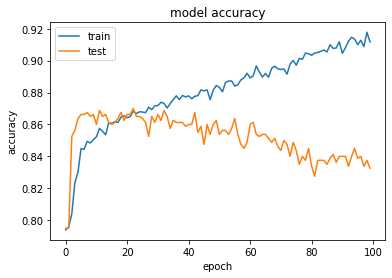

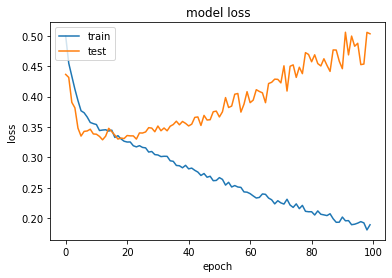

In [36]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [38]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [41]:
print(accuracy_score(y_pred,y_test))

0.8215


In [42]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,1414,181
1,176,229
